In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plty

The following code blocks helps to import the csv files saved

In [2]:
#X
X_lp1 = pd.read_csv("Data_files\X\X_lp1.csv").dropna()

In [3]:
#Y
Y_lp1 = pd.read_csv("Data_files\Y\Y_lp1.csv")

The next step is to find the corelation.
A benchmark of 80 percent is kept in order to eliminate corelated variables since the dataset is small

In [4]:
X_lp1.corr(method = 'pearson')

,Fx_lp1,Fy_lp1,Fz_lp1,Tx_lp1,Ty_lp1,Tz_lp1
Fx_lp1,1.000000,-0.091539,0.172137,-0.195022,0.451223,0.193410
Fy_lp1,-0.091539,1.000000,-0.270830,0.324401,0.401728,-0.410183
Fz_lp1,0.172137,-0.270830,1.000000,0.225272,0.101766,-0.098525
Tx_lp1,-0.195022,0.324401,0.225272,1.000000,0.509459,-0.290672
Ty_lp1,0.451223,0.401728,0.101766,0.509459,1.000000,-0.140790
Tz_lp1,0.193410,-0.410183,-0.098525,-0.290672,-0.140790,1.000000


Since there is no corelation among variables in the datset, other analysis can be done

Adding 2 more rows of resultant force and torque using the formula.
F= √(F_X^2+F_Y^2+ F_Z^2 ) and similarly for T

In [36]:
X_lp1["F_lp1"] = (X_lp1['Fx_lp1']**2 + X_lp1['Fy_lp1']**2 + X_lp1["Fz_lp1"]**2)**0.5
X_lp1["T_lp1"] = (X_lp1["Tx_lp1"]**2 + X_lp1["Ty_lp1"]**2 + X_lp1["Tz_lp1"]**2)**0.5

Applying Min-Max normalization for all the attributes

In [37]:
X_lp1 = (X_lp1 - X_lp1.min())/(X_lp1.max() - X_lp1.min())

In [38]:
X_lp1.head()

,Fx_lp1,Fy_lp1,Fz_lp1,Tx_lp1,Ty_lp1,Tz_lp1,F_lp1,T_lp1
0,0.430233,0.597623,0.944836,0.492636,0.517241,0.526923,0.038976,0.003563
1,0.431894,0.599321,0.944249,0.492636,0.517241,0.526923,0.038318,0.003563
2,0.430233,0.597623,0.943662,0.492636,0.518043,0.526923,0.037681,0.003380
3,0.430233,0.597623,0.944836,0.493373,0.517241,0.526923,0.038976,0.002519
4,0.430233,0.597623,0.944836,0.492636,0.517241,0.526923,0.038976,0.003563


PCA on the resultant values

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_lp1[["F_lp1", "T_lp1"]])
print(pca.explained_variance_ratio_)

[0.89340747 0.10659253]


<AxesSubplot:>

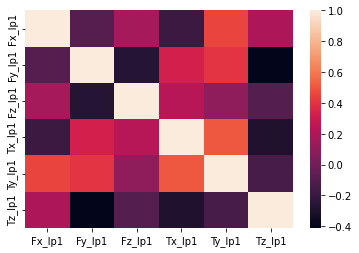

In [40]:
sns.heatmap(X_lp1[["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1"]].corr())

Converting the DF to numpy so as to convert it into 3d arrays and compute the average and overall force torque values
Followed by reshaping it into 3d numpy arrays

In [41]:
X_lp1_numpy = X_lp1.to_numpy()
X_lp1_numpy = X_lp1_numpy.reshape(-1,15,8)

In [42]:
print(X_lp1_numpy.shape)
print(X_lp1_numpy)

(88, 15, 8)
[[[0.43023256 0.59762309 0.94483568 ... 0.52692308 0.03897628 0.00356285]
  [0.43189369 0.59932088 0.94424883 ... 0.52692308 0.03831843 0.00356285]
  [0.43023256 0.59762309 0.94366197 ... 0.52692308 0.03768146 0.00338001]
  ...
  [0.43023256 0.59762309 0.94542254 ... 0.52692308 0.03962371 0.00356285]
  [0.43023256 0.59762309 0.94307512 ... 0.52692308 0.03703405 0.00338001]
  [0.43023256 0.59932088 0.94542254 ... 0.52692308 0.03961865 0.00251931]]

 [[0.43023256 0.59762309 0.94483568 ... 0.52692308 0.03897628 0.00251931]
  [0.43023256 0.59762309 0.94483568 ... 0.52692308 0.03897628 0.00356285]
  [0.43023256 0.59762309 0.94366197 ... 0.52692308 0.03768146 0.00338001]
  ...
  [0.43023256 0.5959253  0.9471831  ... 0.52692308 0.04158049 0.00356285]
  [0.43189369 0.60101868 0.94659624 ... 0.52307692 0.04091366 0.00764146]
  [0.43023256 0.59762309 0.94248826 ... 0.52692308 0.03638665 0.00563336]]

 [[0.43023256 0.59932088 0.94131455 ... 0.52692308 0.0350862  0.00656957]
  [0.43189

Taking the mean of all the 15 readings for all the 8 columns

In [43]:
X_lp1_avg = np.mean(X_lp1_numpy, axis=1)

Converting to dataframes for better visualisation

In [44]:
X_lp1_dfprime = pd.DataFrame(X_lp1_avg, columns=["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1", "F_lp1", "T_lp1"])

Combining X and Y 

In [45]:
X_lp1_df = pd.concat([X_lp1_dfprime, Y_lp1], axis = 1)

X_lp1_df = 

In [46]:
print(X_lp1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fx_lp1  88 non-null     float64
 1   Fy_lp1  88 non-null     float64
 2   Fz_lp1  88 non-null     float64
 3   Tx_lp1  88 non-null     float64
 4   Ty_lp1  88 non-null     float64
 5   Tz_lp1  88 non-null     float64
 6   F_lp1   88 non-null     float64
 7   T_lp1   88 non-null     float64
 8   Y_lp1   88 non-null     float64
dtypes: float64(9)
memory usage: 6.3 KB
None


In [47]:
print(X_lp1_df.describe())

          Fx_lp1     Fy_lp1     Fz_lp1     Tx_lp1     Ty_lp1     Tz_lp1  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    0.427998   0.614454   0.832621   0.466106   0.514421   0.530262   
std     0.077598   0.065556   0.169979   0.102067   0.070181   0.057277   
min     0.019934   0.446406   0.159311   0.124890   0.163272   0.279231   
25%     0.422730   0.597425   0.810104   0.467280   0.503769   0.521410   
50%     0.430399   0.601132   0.922027   0.486524   0.515985   0.526154   
75%     0.435548   0.620911   0.943124   0.492796   0.527145   0.533974   
max     0.931229   0.927334   0.947066   0.744379   0.834376   0.783846   

           F_lp1      T_lp1      Y_lp1  
count  88.000000  88.000000  88.000000  
mean    0.128063   0.114951   1.715909  
std     0.167592   0.156297   1.212472  
min     0.011840   0.003036   0.000000  
25%     0.036427   0.013396   1.000000  
50%     0.041700   0.041131   2.000000  
75%     0.145041   0.140059   3.00000

Now is that all the data are checked for null values (no null values present), now data is visualised using various tools

1. Scatter Plot (done on both decimal and log scale)

lp1

In [48]:
dic = {"Fx_lp1": "red", "Fy_lp1": "blue" , "Fz_lp1": "green" , "Tx_lp1": "black", "Tx_lp1": "purple", "Ty_lp1": "orange", "Tz_lp1": "yellow"}
lp1_scatter = plty.scatter(X_lp1_df, x = ["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1"],  color_discrete_map= dic)
lp1_logscatter = plty.scatter(X_lp1_df,  x = ["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1"] , y= "Y_lp1", log_x=True)
lp1_scatter.show()
lp1_logscatter.show()

Kernel density estimation plot

<AxesSubplot:xlabel='F_lp1', ylabel='Density'>

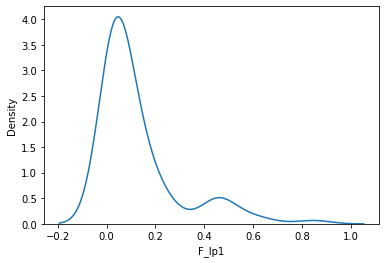

In [49]:
sns.kdeplot(data=X_lp1_df, x = 'F_lp1', bw_method = "scott" , bw_adjust = 1)

<AxesSubplot:xlabel='T_lp1', ylabel='Density'>

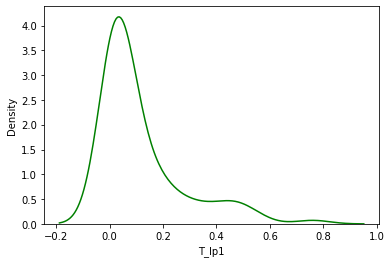

In [50]:
sns.kdeplot(data=X_lp1_df, x = 'T_lp1', color="Green")

In [51]:
plty.scatter(X_lp1_df, x = "F_lp1", y = "T_lp1", color="Y_lp1", log_x=True, log_y=True)

Boxplot

In [52]:
plty.box(X_lp1_df, x = ["F_lp1", "T_lp1"])

Refining the cluster and plotting scatter and box plots without outliers

In [53]:
X_lp1_df = X_lp1_df.drop(X_lp1_df[((X_lp1_df.F_lp1 > 0.03) & (X_lp1_df.Y_lp1==2))].index)
X_lp1_df = X_lp1_df.drop(X_lp1_df[((X_lp1_df.F_lp1 < 0.09) & (X_lp1_df.Y_lp1==3))].index)
X_lp1_df.loc[X_lp1_df["T_lp1"] > 0.312, "T_lp1"] = 0.311
X_lp1_df.loc[X_lp1_df["F_lp1"] > 0.312, "F_lp1"] = 0.288

In [54]:
plty.scatter(X_lp1_df, x = "F_lp1", y = "T_lp1", color="Y_lp1", log_x=True, log_y=True)

In [55]:
plty.scatter(X_lp1_df, x = ["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1"],   color_discrete_map= dic)

In [56]:
plty.scatter(X_lp1_df, x = ["Fx_lp1", "Fy_lp1", "Fz_lp1", "Tx_lp1", "Ty_lp1", "Tz_lp1"],   color= "Y_lp1")

Boxplot

In [57]:
plty.box(X_lp1_df, x = ["F_lp1", "T_lp1"])

To know the class distribution

In [58]:
np.unique(Y_lp1.to_numpy(), return_counts=True)

(array([0., 1., 2., 3.]), array([21, 17, 16, 34], dtype=int64))

Training the dataset

Splitting test and train set in the ratio of 70:30

In [83]:
from sklearn.model_selection import train_test_split

lp1_train, lp1_test = train_test_split(X_lp1_df, test_size=0.3, random_state=2)


1. Decision Tree

In [84]:
print("Training using Decision Tree...")
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.model_selection import cross_validate
acc = pd.DataFrame(columns={"Model": [], "Train": [], "Dev": [], "Test":[], "Precision Score": [], "Recall Score": [], "F1 Score": [] })
X = lp1_train[["F_lp1", "T_lp1" ]]
Y = lp1_train["Y_lp1"]
lp1_model = tree.DecisionTreeClassifier(max_depth=4)
treemodel = cross_validate(lp1_model, X, Y, cv=3,return_train_score=True)
lp1_model.fit(X, Y)

Training using Decision Tree...


DecisionTreeClassifier(max_depth=4)

Results

In [92]:
print("++++++Decision Tree++++++")
print("+++Train Results+++\nParametes: \n",lp1_model.get_params())
train_pred = lp1_model.predict(lp1_train[["F_lp1", "T_lp1"]])
accuracy_scr1 = treemodel['train_score'].mean()
print("\nTrain Score", treemodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", treemodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("\n+++Test Results+++\nParametes: \n",lp1_model.get_params())
test_pred = lp1_model.predict(lp1_test[["F_lp1", "T_lp1"]])
print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp1_test["Y_lp1"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp1_test["Y_lp1"], test_pred, labels=[0,1,2,3])
print("\nConfusion Matrix:\n",confMat)
prec_tree = precision_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_tree)
Rec_tree = recall_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_tree)
f1_tree = f1_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_tree)
acc.loc[len(acc.index)] = ['Decision Tree', accuracy_scr1, treemodel['test_score'].mean(), accuracy_scr2, prec_tree.mean(), Rec_tree.mean(), f1_tree.mean()] 

++++++Decision Tree++++++
+++Train Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Train Score 0.9561403508771931
_____________________________________________________________________________________
Validation Score 0.9298245614035089
_____________________________________________________________________________________

+++Test Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Prediction of test set: [1. 0. 0. 0. 2. 3. 2. 3. 1. 0. 1. 2. 3. 0. 3. 3. 3. 0. 0. 2. 1. 2. 3. 2.
 3.]

Test accurac

In [62]:
#lp1_model.predict_proba(lp1_test[["F_lp1", "T_lp1"]])

Printing the tree

[Text(0.625, 0.9, 'X[0] <= 0.072\ngini = 0.696\nsamples = 57\nvalue = [16, 11, 6, 24]'),
 Text(0.5, 0.7, 'X[1] <= 0.022\ngini = 0.621\nsamples = 33\nvalue = [16, 11, 6, 0]'),
 Text(0.25, 0.5, 'X[0] <= 0.023\ngini = 0.335\nsamples = 20\nvalue = [16, 3, 1, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.375, 0.3, 'X[1] <= 0.011\ngini = 0.266\nsamples = 19\nvalue = [16, 3, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.397\nsamples = 11\nvalue = [8, 3, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 0.029\ngini = 0.473\nsamples = 13\nvalue = [0, 8, 5, 0]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24]')]

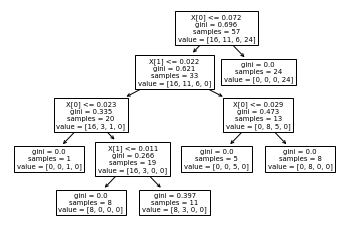

In [63]:
tree.plot_tree(lp1_model)

Exporting the model to txt file

In [64]:
# from sklearn.tree import export_text
# lp1export_tree = export_text(lp1_model) 
# with open('lp1exportree.txt', 'w') as f:
#     f.writelines(lp1export_tree)

2. Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
lp1_forest = RandomForestClassifier(max_depth=4)
X = lp1_train[["F_lp1", "T_lp1"]]
Y = lp1_train["Y_lp1"]
forestmodel = cross_validate(lp1_forest, X, Y, cv=3,return_train_score=True)
lp1_forest.fit(X, Y)

RandomForestClassifier(max_depth=4)

In [86]:
print("++++++Random Forest++++++")
print("+++Train Results+++\nParametes: \n",lp1_forest.get_params())
train_pred = lp1_forest.predict(lp1_train[["F_lp1", "T_lp1"]])
accuracy_scr1 = forestmodel['train_score'].mean()
print("\nTrain Score", forestmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", forestmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp1_forest.get_params())
test_pred = lp1_forest.predict(lp1_test[["F_lp1", "T_lp1"]])
#print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp1_test["Y_lp1"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp1_test["Y_lp1"], test_pred, labels=[0,1,2,3])
print("Confusion Matrix:\n",confMat)
prec_forest = precision_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_forest)
Rec_forest = recall_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_forest)
f1_forest = f1_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_forest)
acc.loc[len(acc.index)] = ['Random Forest', accuracy_scr1, forestmodel['test_score'].mean(), accuracy_scr2, prec_forest.mean(), Rec_forest.mean(), f1_forest.mean()] 

++++++Random Forest++++++
+++Train Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Score 0.9561403508771931
_____________________________________________________________________________________
Validation Score 0.912280701754386
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_e

3. Support Vector Machines

In [67]:
from sklearn import svm
X = lp1_train[["F_lp1", "T_lp1" ]]
Y = lp1_train["Y_lp1"]
lp1_SVM_Model = svm.SVC(decision_function_shape='ovo')
svmmodel = cross_validate(lp1_SVM_Model, X, Y, cv=3,return_train_score=True)
lp1_SVM_Model.fit(X, Y)

SVC(decision_function_shape='ovo')

In [91]:
print("++++++Support Vector Machines++++++")
print("+++Train Results+++\nParametes: \n",lp1_SVM_Model.get_params())
train_pred = lp1_SVM_Model.predict(lp1_train[["F_lp1", "T_lp1"]])
accuracy_scr1 = svmmodel['train_score'].mean()
print("\nTrain Score", svmmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", svmmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp1_SVM_Model.get_params())
X_test = lp1_test[["F_lp1", "T_lp1" ]]
Y_test = lp1_test["Y_lp1"]
test_pred = lp1_SVM_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("\nTest Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp1_test["Y_lp1"], test_pred, labels=[0,1,2,3])
print("Confusion Matrix:\n",confMat)
prec_SVM = precision_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_SVM)
Rec_SVM = recall_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_SVM)
f1_SVM = f1_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_SVM)
acc.loc[len(acc.index)] = ['SVM', accuracy_scr1, svmmodel['test_score'].mean(), accuracy_scr2,prec_SVM.mean(), Rec_SVM.mean(), f1_SVM.mean()] 

++++++Support Vector Machines++++++
+++Train Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Score 0.7192982456140351
_____________________________________________________________________________________
Validation Score 0.7192982456140351
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test Accuracy 0.52
Confusion Matrix:
 [[5 0 0 0]
 [6 0 0 0]
 [6 0 0 0]
 [0 0 0 8]]

Precision Scor

4. Gaussian Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
X = lp1_train[["F_lp1", "T_lp1" ]]
Y = lp1_train["Y_lp1"]
lp1_GNB_Model = GaussianNB()
gnbmodel = cross_validate(lp1_GNB_Model, X, Y, cv=3,return_train_score=True)
lp1_GNB_Model.fit(X, Y)

GaussianNB()

In [88]:
print("++++++Gaussian Naive Bayes++++++")
print("+++Train Results+++\nParametes: \n",lp1_GNB_Model.get_params())
train_pred = lp1_GNB_Model.predict(lp1_train[["F_lp1", "T_lp1"]])
accuracy_scr1 = gnbmodel['train_score'].mean()
print("\nTrain Score", gnbmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", gnbmodel['test_score'].mean())
print("_____________________________________________________________________________________")
X_test = lp1_test[["F_lp1", "T_lp1" ]]
Y_test = lp1_test["Y_lp1"]
test_pred = lp1_GNB_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("Test Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp1_test["Y_lp1"], test_pred, labels=[0,1,2,3])
print("Confusion Matrix:\n",confMat)
prec_GNB = precision_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_GNB)
Rec_GNB = recall_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_GNB)
f1_GNB = f1_score(lp1_test["Y_lp1"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_GNB)
acc.loc[len(acc.index)] = ['Gaussian Naive Bayes', accuracy_scr1, gnbmodel['test_score'].mean(), accuracy_scr2, prec_GNB.mean(), Rec_GNB.mean(), f1_GNB.mean()] 

++++++Gaussian Naive Bayes++++++
+++Train Results+++
Parametes: 
 {'priors': None, 'var_smoothing': 1e-09}

Train Score 0.9473684210526315
_____________________________________________________________________________________
Validation Score 0.912280701754386
_____________________________________________________________________________________
Test Accuracy 0.96
Confusion Matrix:
 [[5 0 0 0]
 [1 5 0 0]
 [0 0 6 0]
 [0 0 0 8]]

Precision Score: [0.83333333 1.         1.         1.        ]
Recall Score: [1.         0.83333333 1.         1.        ]
F1 Score: [0.90909091 0.90909091 1.         1.        ]
0.04


5. Shallow Neural Networks

Splitting the data as test validation (dev) and train set using stratified shuffling with 4 n splits

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
lp1_train = sss.split(X_lp1_df[["F_lp1", "T_lp1" ]], X_lp1_df["Y_lp1"])
for train,test in sss.split(X_lp1_df[["F_lp1", "T_lp1" ]], X_lp1_df["Y_lp1"]):
    X = X_lp1_df[["F_lp1", "T_lp1" ]].iloc[train]
    Y = X_lp1_df["Y_lp1"].iloc[train]
    X_dt = X_lp1_df[["F_lp1", "T_lp1" ]].iloc[test]
    Y_dt = X_lp1_df["Y_lp1"].iloc[test]
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train,test in sss.split(X_dt, Y_dt):
    xd = X_dt.iloc[train]
    yd = Y_dt.iloc[train]
    X_test = X_dt.iloc[test]
    Y_test = Y_dt.iloc[test]
# lp1_train, lp1_Devtest = train_test_split(X_lp1_df, test_size=0.3, random_state=2)
# lp1_dev, lp1_test = train_test_split(lp1_Devtest, test_size=0.5, random_state=2)
# print(xd.value_counts())  
# print(yd.value_counts())
# print(X_test.value_counts())  
# print(Y_test.value_counts())

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf   #For reproducability
tf.random.set_seed(2)
lp1_SNN_model = tf.keras.Sequential()
lp1_SNN_model.add(Dense(2, activation='relu', input_shape = (2,)))
lp1_SNN_model.add(Dense(100, activation='relu'))
#lp1_SNN_model.add(Dropout(0.2))
lp1_SNN_model.add(Dense(30, activation='relu'))
# lp1_SNN_model.add(Dense(84, activation='relu'))
# lp1_SNN_model.add(Dense(84, activation='relu'))
# lp1_SNN_model.add(Dense(14, activation='relu'))
lp1_SNN_model.add(Dense(4, activation='softmax'))

In [73]:
#opti = keras.optimizers.experimental.SGD(learning_rate=0.01)
opti = keras.optimizers.Adam(learning_rate=0.007)
lp1_SNN_model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history = lp1_SNN_model.fit(X, Y, batch_size=8, epochs=95, validation_data = (xd, yd))

Epoch 1/95
8/8 [==============================] - 1s 34ms/step - loss: 1.3828 - accuracy: 0.2807 - val_loss: 1.3564 - val_accuracy: 0.4167
Epoch 2/95
8/8 [==============================] - 0s 6ms/step - loss: 1.3604 - accuracy: 0.3860 - val_loss: 1.3424 - val_accuracy: 0.4167
Epoch 3/95
8/8 [==============================] - 0s 5ms/step - loss: 1.3425 - accuracy: 0.3860 - val_loss: 1.3245 - val_accuracy: 0.4167
Epoch 4/95
8/8 [==============================] - 0s 5ms/step - loss: 1.3171 - accuracy: 0.3860 - val_loss: 1.3004 - val_accuracy: 0.4167
Epoch 5/95
8/8 [==============================] - 0s 6ms/step - loss: 1.3090 - accuracy: 0.3860 - val_loss: 1.2886 - val_accuracy: 0.4167
Epoch 6/95
8/8 [==============================] - 0s 6ms/step - loss: 1.3001 - accuracy: 0.3860 - val_loss: 1.2662 - val_accuracy: 0.4167
Epoch 7/95
8/8 [==============================] - 0s 6ms/step - loss: 1.2781 - accuracy: 0.3860 - val_loss: 1.2275 - val_accuracy: 0.4167
Epoch 8/95
8/8 [=================

Plotting loss vs epoch

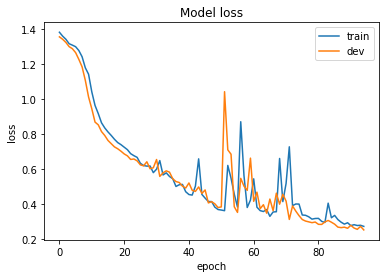

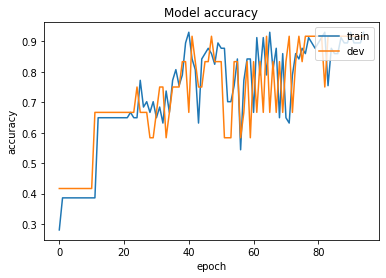

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [75]:
lp1_SNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 4)                 124       
                                                                 
Total params: 3,460
Trainable params: 3,460
Non-trainable params: 0
_________________________________________________________________


In [76]:
pred = lp1_SNN_model.predict(X_test)
# #print(pred*100)
pred_class = np.argmax(pred, axis=1)
# #print(pred_class)
# acc_score_SNN = accuracy_score(Y_test, pred_class)
# print(acc_score_SNN)
confMat = confusion_matrix(Y_test, pred_class, labels=[0,1,2,3])
print("Confusion Matrix:\n",confMat)
prec_SNN = precision_score(Y_test, pred_class, average=None, zero_division=0)
print("\nPrecision Score:",prec_SNN)
Rec_SNN = recall_score(Y_test, pred_class, average=None, zero_division=0)
print("Recall Score:",Rec_SNN)
f1_SNN = f1_score(Y_test, pred_class, average=None, zero_division=0)
print("F1 Score:",f1_SNN)

1/1 [==============================] - 0s 97ms/step
Confusion Matrix:
 [[3 0 0 0]
 [1 2 0 0]
 [0 0 2 0]
 [0 0 0 5]]

Precision Score: [0.75 1.   1.   1.  ]
Recall Score: [1.         0.66666667 1.         1.        ]
F1 Score: [0.85714286 0.8        1.         1.        ]


In [77]:
print(lp1_SNN_model.metrics_names)
test_accuracy = lp1_SNN_model.evaluate(X_test, Y_test)
print(test_accuracy)

['loss', 'accuracy']
1/1 [==============================] - 0s 38ms/step - loss: 0.2597 - accuracy: 0.9231
[0.25969716906547546, 0.9230769276618958]


In [78]:
acc.loc[len(acc.index)] = ['ANN', ((history.history['accuracy'][-1])),((history.history['val_accuracy'][-1])), test_accuracy[1], prec_SNN.mean(), Rec_SNN.mean(), f1_SNN.mean()] 

Exporting the model and weights

In [79]:
#lp1_SNN_model.save('exports/LP1_SNN_Export')
# lp1_SNN_model.save_weights('exports/LP1_SNNWeights_Export')

Overall parameters

In [81]:
acc

,Model,Train,Dev,Test,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.956140,0.929825,0.920000,0.928571,0.916667,"[[5, 0, 0, 0], [2, 4, 0, 0], [0, 0, 6, 0], [0,..."
1,Random Forest,0.956140,0.912281,0.920000,0.928571,0.916667,0.908333
2,SVM,0.719298,0.719298,0.520000,0.323529,0.500000,0.363636
3,Gaussian Naive Bayes,0.947368,0.912281,0.960000,0.958333,0.958333,0.954545
4,ANN,0.929825,0.916667,0.923077,0.937500,0.916667,0.914286
